Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']

🔍 Accuracy: 0.956140350877193

📊 Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


📉 Confusion Matrix:
 [[39  4]
 [ 1 70]]


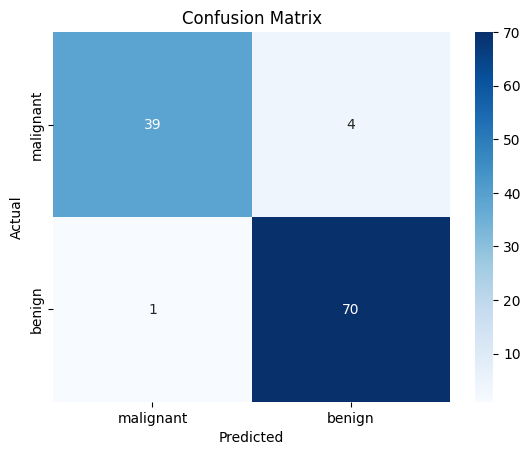

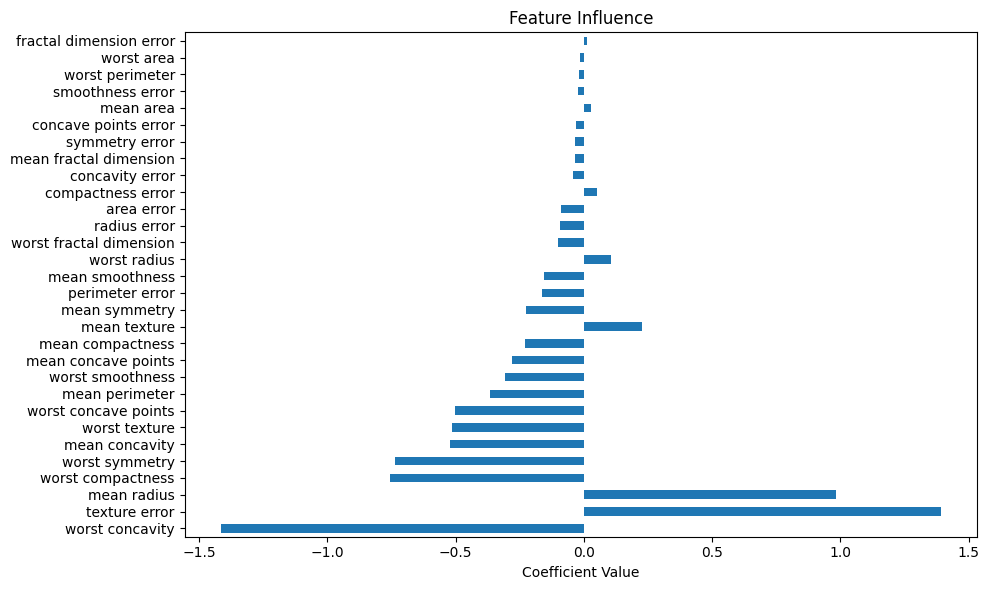

In [5]:
# 📌 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 Step 2: Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)

# 📌 Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 4: Train Logistic Regression Model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# 📌 Step 5: Make Predictions
y_pred = model.predict(X_test)

# 📌 Step 6: Evaluate the Model
print("\n🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📌 Step 7: Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📌 Step 8: Plot Feature Importance
coefs = pd.Series(model.coef_[0], index=X.columns)
coefs.sort_values(key=abs, ascending=False).plot(kind='barh', figsize=(10,6), title="Feature Influence")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()
